In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datadotworld as dw


In [0]:
#!pip install datadotworld
#!pip install datadotworld[pandas]

In [0]:
#!dw configure


In [0]:
#drive.mount("/content/drive")

In [0]:
!cd 'drive/'

In [5]:
ls

drive/  sample_data/


In [6]:
cd 'drive/My Drive/Colab Notebooks/dw_matrix/matrix_1'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_1


In [7]:
ls


Day3.ipynb


In [0]:
!echo 'data' > .gitignore


In [0]:
!mkdir data

In [10]:
ls


data/  Day3.ipynb


In [0]:
!git add .gitignore

In [0]:
data = dw.load_dataset('datafiniti/mens-shoe-prices')

In [13]:
df = data.dataframes['7004_1']
df.shape

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


(19387, 48)

In [14]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [16]:
df['prices_currency'].unique()

array(['USD', 'AUD', 'CAD', 'EUR', nan, 'GBP', 'New with box',
       'UnbeatableSale.com, Inc. - Walmart.com',
       'PalmBeach Jewelry - Walmart.com', 'new', 'New without tags',
       'SHOEBACCA LTD. - Walmart.com', 'Shoes.com',
       'Wholesale Costume and Party Supplies - Walmart.com'], dtype=object)

In [17]:
df['prices_currency'].value_counts()

USD                                                   18524
AUD                                                     338
CAD                                                     303
EUR                                                     107
GBP                                                      22
new                                                       3
PalmBeach Jewelry - Walmart.com                           3
New with box                                              3
UnbeatableSale.com, Inc. - Walmart.com                    3
Wholesale Costume and Party Supplies - Walmart.com        2
New without tags                                          1
Shoes.com                                                 1
SHOEBACCA LTD. - Walmart.com                              1
Name: prices_currency, dtype: int64

In [0]:
df_usd = df[df['prices_currency']=='USD'].copy()

In [29]:
df_usd.shape

(18524, 48)

In [0]:
df_usd['prices_amountmin'] = df_usd['prices_amountmin'].astype(np.float16)

In [41]:
df_usd['prices_amountmin'].head()

0    39.87500
1    52.00000
2    40.03125
3    50.31250
4    46.25000
Name: prices_amountmin, dtype: float16

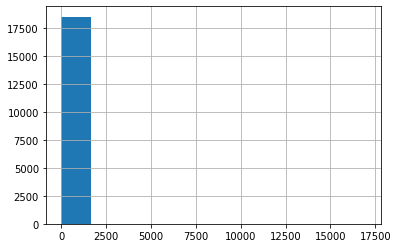

In [43]:
df_usd['prices_amountmin'].hist()

In [0]:
filter_max = np.percentile(df_usd['prices_amountmin'],99)

In [0]:
df_usd_filter = df_usd[df_usd['prices_amountmin']<filter_max]

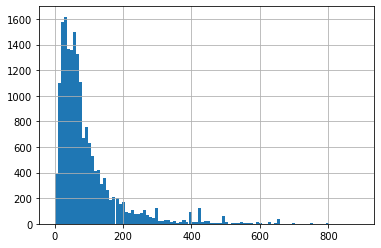

In [54]:
df_usd_filter['prices_amountmin'].hist(bins=100)

In [0]:
df.to_csv('data/shoes_prices.csv',index=False)

In [68]:
ls


data/  Day3.ipynb


In [0]:
!git add Day3.ipynb

In [78]:
!git commit -m 'Mens Shoe Prices Dataset - data.world - fix'


[master 065b3f4] Mens Shoe Prices Dataset - data.world - fix
 1 file changed, 1 insertion(+), 1 deletion(-)


In [80]:
!git push -u origin master

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 857 bytes | 857.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/grzb/dw_matrix.git
   e6e0cb5..065b3f4  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
